# Lecture 7a.  Intro to Simple, Univariate Linear Regression.

## Install necessary libraries with activated virtual env.
* Install from Windows Command Line, not from here!


```
pip install statsmodels
pip install pingouin
pip install scikit-learn
```

In [1]:
# First install with activated virtual env.
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
# First make sure the file is in the path specified below.
df = pd.read_csv("temp_to_coffee.csv")
df.head()

,X,Y
0,20,396
1,22,297
2,23,397
3,18,425
4,19,425


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.columns

Index(['X', 'Y'], dtype='object')

In [5]:
df.dtypes

X    int64
Y    int64
dtype: object

In [6]:
type(df["X"])

pandas.core.series.Series

In [7]:
# list_of_X = list(df.X)
# list_of_X

# X_as_list =  df.X.tolist()  # exactly the same as before
# X_as_list

In [8]:
type(df.X)  # Same as above, different syntax. 

pandas.core.series.Series

In [9]:
df["X"]

0     20
1     22
2     23
3     18
4     19
5     24
6     25
7     20
8     22
9     18
10    16
11    16
12    17
13    20
14    21
15    19
16    15
17    15
18    18
19    20
Name: X, dtype: int64

In [10]:
# Convention for readablity purposes!
# to assign as input to linear regression libraries' functions.
X = df["X"]  
y = df["Y"]

In [11]:
type(X)

pandas.core.series.Series

In [12]:
X

0     20
1     22
2     23
3     18
4     19
5     24
6     25
7     20
8     22
9     18
10    16
11    16
12    17
13    20
14    21
15    19
16    15
17    15
18    18
19    20
Name: X, dtype: int64

In [13]:
X = sm.add_constant(X)

In [14]:
X.head()

,const,X
0,1.0,20
1,1.0,22
2,1.0,23
3,1.0,18
4,1.0,19


In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     7.963
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0113
Time:                        13:43:56   Log-Likelihood:                -112.85
No. Observations:                  20   AIC:                             229.7
Df Residuals:                      18   BIC:                             231.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        713.8571    112.629      6.338      0.0

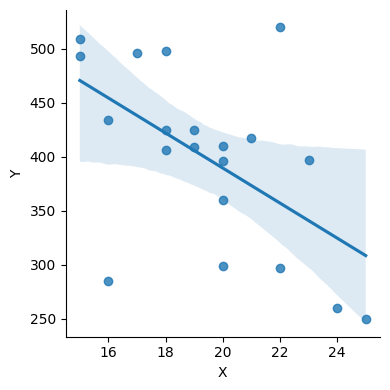

In [17]:
# 
g = sns.lmplot(data=df,
               x="X", y="Y",
               height=4)

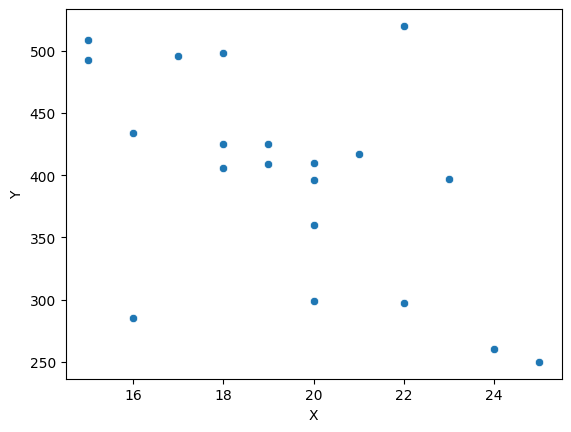

In [18]:
g = sns.scatterplot(data=df,
                    x="X", y="Y")

In [19]:
# rename takes a dictionary as an input argument.
df = df.rename(columns={"X": "temperature", "Y": "quantity"})

In [20]:
df.describe()

,temperature,quantity
count,20.000000,20.000000
mean,19.400000,399.300000
std,2.872739,84.109014
min,15.000000,250.000000
25%,17.750000,344.750000
50%,19.500000,409.500000
75%,21.250000,448.750000
max,25.000000,520.000000


In [21]:
# percentiles takes a list as an argument
df.describe(percentiles=[0.1, 0.2, 0.4, 0.6, 0.8])

,temperature,quantity
count,20.000000,20.000000
mean,19.400000,399.300000
std,2.872739,84.109014
min,15.000000,250.000000
10%,15.900000,282.500000
20%,16.800000,298.600000
40%,18.600000,402.400000
50%,19.500000,409.500000
60%,20.000000,420.200000
80%,22.000000,493.600000
